In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split

%matplotlib inline

In [34]:
# generate some data
X = np.linspace(0, 10, 200)
y = 4*X + 3.2 + np.random.normal(scale=2, size=X.shape[0])-0.2*X**2
X = X.reshape(-1,1)

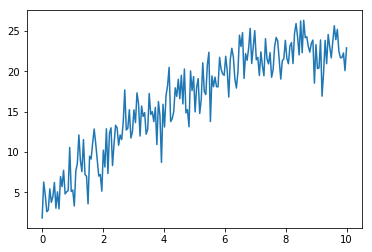

In [35]:
plt.plot(X, y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train, y_train), lr.coef_, lr.intercept_

(0.8283641099458052, array([2.02535746]), 6.295286260268908)

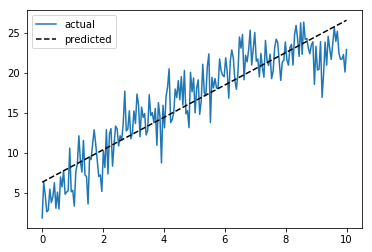

In [38]:
plt.plot(X, y, label='actual')
plt.plot(X, lr.predict(X), 'k--', label='predicted')
plt.legend()

In [39]:
rcv = RidgeCV(scoring='neg_mean_absolute_error').fit(X_train, y_train)
rcv.score(X_train, y_train), rcv.alpha_

(0.8283641045086547, 0.1)

In [40]:
y_predict = rcv.predict(X_train)
mean_absolute_error(y_train, y_predict), r2_score(y_train, y_predict)

(2.1459217163456024, 0.8283641045086547)

In [44]:
GridSearchCV(Ridge(), param_grid={'alpha': [1e-5, 1e-3, 1, 3, 10, 30]}, scoring='neg_mean_absolute_error').fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.001, 1, 3, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [41]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [45]:
len(sklearn.metrics.SCORERS.keys())

35

In [46]:
from sklearn.metrics import fbeta_score, make_scorer

In [50]:
np.abs(np.array([4,3,2]) -np.array([3,3,3])).mean()

0.6666666666666666

In [53]:
def mean_abs_error(y_true, y_predict):
    return np.abs(np.array(y_true) - np.array(y_predict)).mean()

In [57]:
mean_abs_error(pd.Series([4,3,2]), pd.Series([1,1,1]))

2.0

In [59]:
mean_abs_scorer = make_scorer(mean_abs_error, greater_is_better=False)

In [60]:
GridSearchCV(Ridge(), param_grid={'alpha': [1e-5, 1e-3, 1, 3, 10, 30]}, scoring=mean_abs_scorer).fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.001, 1, 3, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_abs_error, greater_is_better=False),
       verbose=0)